In this mini project, I have inspected different historical stock distributions to determine if they follow the standard assumption that stocks are normally distributed. 

My strategy was as follows:
1. Gather stock data from the Fortune 500 companies
2. Test whether the stock data from various time periods yields stocks which do not have strong statistical evidence against normal distribution. 
3. Remove extreme outliers using various normality tests and repeat (2).

Step 1. Gather stock data from the Fortune 500 companies and initialize data for remaining steps. 

My time periods are: 

2024-01-01 to 2025-05-31,

2022-01-01 to 2024-01-01,

2023-01-01 to 2024-01-01,

2019-01-01 to 2024-01-01,

2025-01-01 to 2025-05-31,

2024-09-01 to 2025-01-01,

2022-06-01 to 2023-01-01,

2021-04-01 to 2021-04-30,

2025-02-01 to 2025-04-28,

2024-10-01 to 2024-11-01,

2023-01-01 to 2023-05-01,

2022-06-01 to 2022-10-01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')
import yfinance as yf

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]


#Clean the tickers DataFrame to remove undefined values.
updated_tickers = [x for x in tickers.Symbol if x not in ['BF.B', 'BRK.B', 'MMM', 'SOLV','GEV', 'SW']]

# Get the data for tickers from yahoo finance

stock_data = [yf.download(updated_tickers,'2024-1-1','2025-5-31', auto_adjust=True)['Close'],
              yf.download(updated_tickers,'2022-1-1','2024-1-1', auto_adjust=True)['Close'], 
              yf.download(updated_tickers,'2023-1-1','2024-1-1', auto_adjust=True)['Close'],
                yf.download(updated_tickers,'2019-1-1','2024-1-1', auto_adjust=True)['Close'], 
              yf.download(updated_tickers,'2025-1-1','2025-5-31', auto_adjust=True)['Close'],
               yf.download(updated_tickers,'2024-9-1','2025-1-1', auto_adjust=True)['Close'],
                yf.download(updated_tickers,'2022-6-1','2023-1-1', auto_adjust=True)['Close'],
                yf.download(updated_tickers,'2021-4-1','2021-8-30', auto_adjust=True)['Close'],
              yf.download(updated_tickers,'2025-2-1','2025-4-28', auto_adjust=True)['Close'],
              yf.download(updated_tickers,'2024-10-1','2024-11-01', auto_adjust=True)['Close'],
              yf.download(updated_tickers,'2023-1-1','2023-05-01', auto_adjust=True)['Close'],
              yf.download(updated_tickers,'2022-6-1','2022-10-01', auto_adjust=True)['Close']]

time_periods = ['2024-01-01 to 2025-05-31',
                '2022-01-01 to 2024-01-01',
                '2023-01-01 to 2024-01-01',
                '2019-01-01 to 2024-01-01',
                '2025-01-01 to 2025-05-31',
                '2024-09-01 to 2025-01-01',
                '2022-06-01 to 2023-01-01',
                '2021-04-01 to 2021-04-30',
                '2025-02-01 to 2025-04-28', 
                '2024-10-01 to 2024-12-01',
                '2023-01-01 to 2023-05-01',
                '2022-06-01 to 2022-10-01']


[*********************100%***********************]  497 of 497 completed
[*********************100%***********************]  497 of 497 completed
[*********************100%***********************]  497 of 497 completed
[*********************100%***********************]  497 of 497 completed
[*********************100%***********************]  497 of 497 completed
[*********************100%***********************]  497 of 497 completed
[*********************100%***********************]  497 of 497 completed

2 Failed downloads:
['KVUE', 'VLTO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-6-1 -> 2023-1-1) (Yahoo error = "Data doesn\'t exist for startDate = 1654056000, endDate = 1672549200")')
[*********************100%***********************]  497 of 497 completed

4 Failed downloads:
['KVUE', 'CEG', 'VLTO', 'GEHC']: YFPricesMissingError('possibly delisted; no price data found  (1d 2021-4-1 -> 2021-8-30) (Yahoo error = "Data doesn\'t exist for startDate = 16172

In [2]:
stock_logreturns = [np.log(data/data.shift(1)) for data in stock_data]

Step 2:  Test whether the stock data from Jan 2020 to May 2025 has statistical evidence of not being normally distributed.

Here, "normal stocks" refers to stocks without strong statistical evidence that they are NOT normal. 

In [3]:
NormalStocksDP= [[] for _ in range(len(time_periods))]
NonNormalStocksDP= [[] for _ in range(len(time_periods))]

NormalStocksSW = [[] for _ in range(len(time_periods))]
NonNormalStocksSW = [[] for _ in range(len(time_periods))]

NormalStocksKS = [[] for _ in range(len(time_periods))]
NonNormalStocksKS =[[] for _ in range(len(time_periods))]

for i, data in enumerate(stock_logreturns):
    for ticker in updated_tickers:
        p = 0
        x = [y for y in data[ticker] if not np.isnan(y)]

        if len(x)< 20:
            print("This stock lacks sufficient observations in this time period for", ticker)
            continue
        
        # D'Agostino and Pearson’s test
        p = stats.normaltest(x)[1]
        if p < 0.05:
            NonNormalStocksDP[i].append(ticker)
        else:
            NormalStocksDP[i].append(ticker)
        
        # Shapiro-Wilk test
        p = stats.shapiro(x)[1]
        if p < 0.05:
            NonNormalStocksSW[i].append(ticker) 
        else:
            NormalStocksSW[i].append(ticker)
       
        # Kolmogorov-Smirnov test
        p = stats.kstest(x, 'norm')[1]
        if p < 0.05:
            NonNormalStocksKS[i].append(ticker)
        else:
            NormalStocksKS[i].append(ticker)
    print(f"According to the D'Agostino and Pearson’s test, for the period {time_periods[i]}:",
               "the number of normal stocks is", len(NormalStocksDP[i]), "and the number of non-normal stocks is", len(NonNormalStocksDP[i]))
    print(f"According to the Shapiro-Wilk test, for the period {time_periods[i]}:",
               "the number of normal stocks is", len(NormalStocksSW[i]), "and the number of non-normal stocks is", len(NonNormalStocksSW[i]))
    print(f"According to the Kolmogorov-Smirnov test, for the period {time_periods[i]}:",
               "the number of normal stocks is", len(NormalStocksKS[i]), "and the number of non-normal stocks is", len(NonNormalStocksKS[i]))
    print("\n")


According to the D'Agostino and Pearson’s test, for the period 2024-01-01 to 2025-05-31: the number of normal stocks is 0 and the number of non-normal stocks is 497
According to the Shapiro-Wilk test, for the period 2024-01-01 to 2025-05-31: the number of normal stocks is 1 and the number of non-normal stocks is 496
According to the Kolmogorov-Smirnov test, for the period 2024-01-01 to 2025-05-31: the number of normal stocks is 0 and the number of non-normal stocks is 497


According to the D'Agostino and Pearson’s test, for the period 2022-01-01 to 2024-01-01: the number of normal stocks is 8 and the number of non-normal stocks is 489
According to the Shapiro-Wilk test, for the period 2022-01-01 to 2024-01-01: the number of normal stocks is 8 and the number of non-normal stocks is 489
According to the Kolmogorov-Smirnov test, for the period 2022-01-01 to 2024-01-01: the number of normal stocks is 0 and the number of non-normal stocks is 497


According to the D'Agostino and Pearson’s 

According to the normality tests,

1. No stock path passes the Kolmogorov-Smirnov test, which is unsurprising given the data sets, which are relatively small in some time periods. This test may not be well-suited for shorter time-periods, as this is one limitation of the Kolmogorov-Smirnov test. 

2. In longer time periods (more than 1 year), stocks are generally not normal

3. In shorter periods, (less than 6 months), more stocks are normal. In some time periods more than half the stocks are considered normal. 

This suggests that the assumption of normality may be better suited for estimating stock behavior over the short term rather than the long term. 

Step 3: Remove extremal data. In the code below, I have removed data outside the 1st and 99th percentiles. 

In [4]:
Notenoughdata = [[] for _ in range(len(time_periods))]  
FNormalStocksDP= [[] for _ in range(len(time_periods))]
FNonNormalStocksDP= [[] for _ in range(len(time_periods))]

FNormalStocksSW = [[] for _ in range(len(time_periods))]
FNonNormalStocksSW = [[] for _ in range(len(time_periods))]

FNormalStocksKS = [[] for _ in range(len(time_periods))]
FNonNormalStocksKS =[[] for _ in range(len(time_periods))]

# Filter the data based on mean and standard deviation
for i in range(len(time_periods)):
    for ticker in updated_tickers:
        if ticker not in stock_logreturns[i].columns:
            continue

        z = [y for y in stock_logreturns[i][ticker] if not np.isnan(y)]
        z = np.array(z)
        if len(z) < 20:
            Notenoughdata[i].append(ticker)
            continue

        upper = np.percentile(z, 99)
        lower = np.percentile(z,1)
        x= [y for y in z if y>= lower and y <= upper]
        x = np.array(x)
        if len(x) < 20:
            Notenoughdata[i].append(ticker)
            continue

        p = 0

        # D'Agostino and Pearson’s test
        p = stats.normaltest(x)[1]
        if p < 0.05:
            FNonNormalStocksDP[i].append(ticker)
        else:
            FNormalStocksDP[i].append(ticker)
        
        # Shapiro-Wilk test
        p = stats.shapiro(x)[1]
        if p < 0.05:
            FNonNormalStocksSW[i].append(ticker) 
        else:
            FNormalStocksSW[i].append(ticker)
       
        # Kolmogorov-Smirnov test
        p = stats.kstest(x, 'norm')[1]
        if p < 0.05:
            FNonNormalStocksKS[i].append(ticker)
        else:
            FNormalStocksKS[i].append(ticker)
    print(f"According to the D'Agostino and Pearson’s test, for the period {time_periods[i]}:",
               "the number of normal stocks is", len(FNormalStocksDP[i]), "and the number of non-normal stocks is", len(FNonNormalStocksDP[i]))
    print(f"According to the Shapiro-Wilk test, for the period {time_periods[i]}:",
               "the number of normal stocks is", len(FNormalStocksSW[i]), "and the number of non-normal stocks is", len(FNonNormalStocksSW[i]))
    print(f"According to the Kolmogorov-Smirnov test, for the period {time_periods[i]}:",
               "the number of normal stocks is", len(FNormalStocksKS[i]), "and the number of non-normal stocks is", len(FNonNormalStocksKS[i]))
    print("\n")
    if len(Notenoughdata[i]) != 0:
         print(f"Not enough data for the following stocks in the period {time_periods[i]}:", Notenoughdata[i])
    print("\n")

According to the D'Agostino and Pearson’s test, for the period 2024-01-01 to 2025-05-31: the number of normal stocks is 203 and the number of non-normal stocks is 294
According to the Shapiro-Wilk test, for the period 2024-01-01 to 2025-05-31: the number of normal stocks is 183 and the number of non-normal stocks is 314
According to the Kolmogorov-Smirnov test, for the period 2024-01-01 to 2025-05-31: the number of normal stocks is 0 and the number of non-normal stocks is 497




According to the D'Agostino and Pearson’s test, for the period 2022-01-01 to 2024-01-01: the number of normal stocks is 379 and the number of non-normal stocks is 118
According to the Shapiro-Wilk test, for the period 2022-01-01 to 2024-01-01: the number of normal stocks is 287 and the number of non-normal stocks is 210
According to the Kolmogorov-Smirnov test, for the period 2022-01-01 to 2024-01-01: the number of normal stocks is 0 and the number of non-normal stocks is 497




According to the D'Agostino an

After removing extremal data, the number of normal stocks is larger as the time period length shrinks. For month-long periods, nearly all stocks pass the D'Agostino and Pearson's test and the Shapiro-Wilk test. This also corroborates the hypothesis that stocks follow normal distributions more over the short term, in particular when extreme behavior is ignored. 

Looking at the data above, in the block of code below, I have randomly selected 5 stocks from the "normal" stocks in the period from 2019-2024 to visualize just how normal they are with and without their extremal values.

Sample of 3 random tickers from the S&P 500:
['TECH', 'HES', 'ANSS']


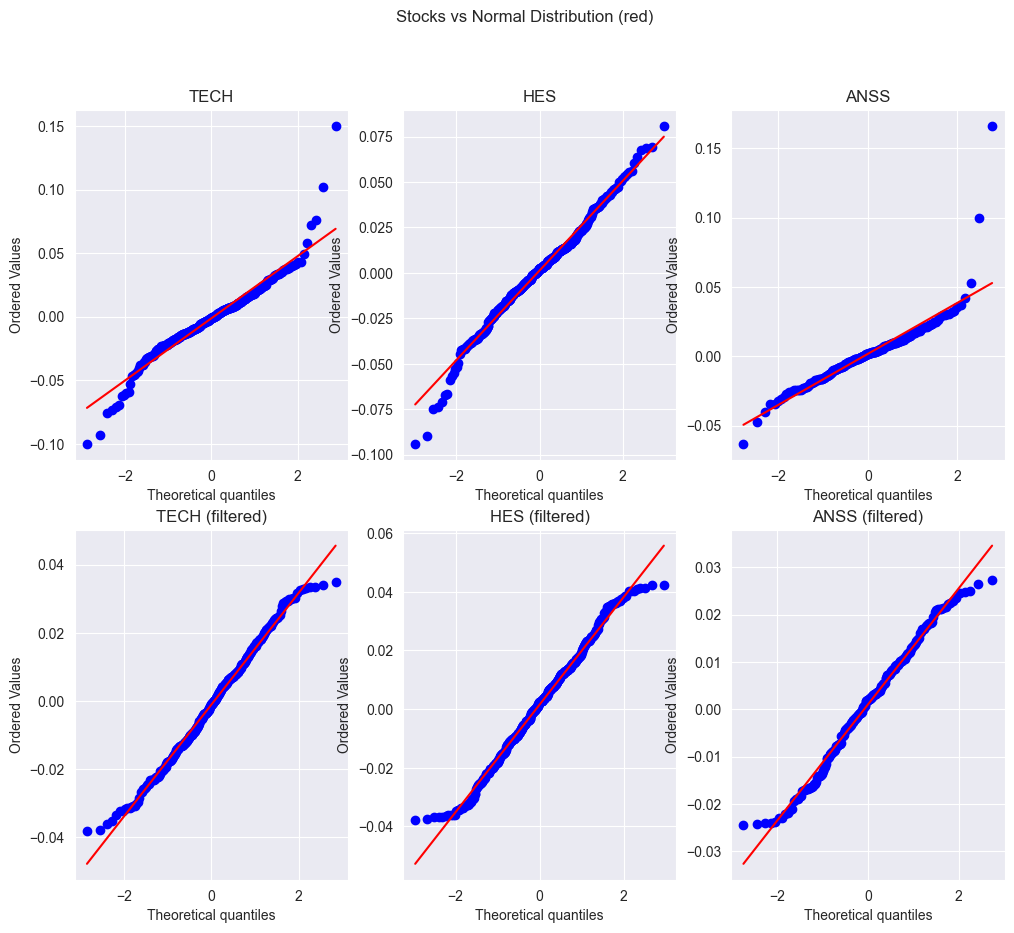

In [7]:
import random
i=3
sample = random.sample(FNormalStocksDP[i], 3)
print("Sample of 3 random tickers from the S&P 500:")
print(sample)   
z = []
g = []


for i in range(len(sample)):
    w = [y for y in stock_logreturns[i][sample[i]] if not np.isnan(y)]
    w = np.array(w)
    g.append(w)


for i in range(len(sample)):
        w= [y for y in stock_logreturns[i][sample[i]] if not np.isnan(y)]
        w= np.array(w)
        upper = np.percentile(w, 95)
        lower = np.percentile(w,5)
        x= [y for y in w if y>= lower and y <= upper]
        x = np.array(x)
        z.append(x)


fig, axes = plt.subplots(2, 3, figsize=(12, 10))
plt.suptitle("Stocks vs Normal Distribution (red)")
datasetExtremeExcl = z
datasetExtremeIncl = g
set1 = [(datasetExtremeIncl[0], sample[0]), (datasetExtremeIncl[1], sample[1]), (datasetExtremeIncl[2], sample[2])]
set2 = [(datasetExtremeExcl[0], sample[0]+ ' (filtered)'), (datasetExtremeExcl[1], sample[1]+ ' (filtered)'), (datasetExtremeExcl[2], sample[2]+ ' (filtered)')]
for ax, (data, title) in zip(axes.flatten(), set1+set2):
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(title, fontsize=12)

plt.show()



The visualization shows that the filtered data fits to the line (the normal distribution) better, and, moreover, the filtered visualizations look fairly similar to one another across different stocks. That said, these are not perfect fits, and the tests for normality do not confirm a perfect normal distribution. 

Upon further investigation, some analysts postulate that stocks behave closer to a Laplace distribution. Below is a visualization of 3 random "normal" stocks vs the Laplace distributions. 

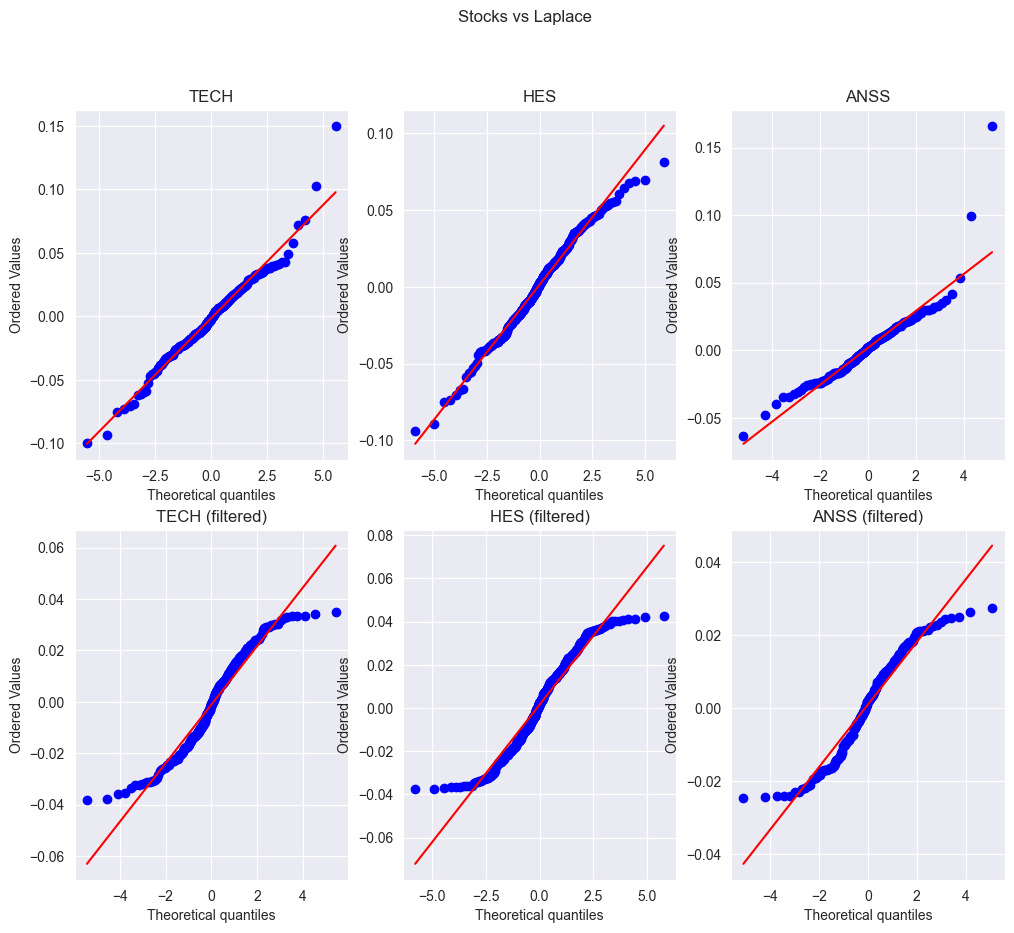

In [ ]:
fig2, axes2 = plt.subplots(2, 3, figsize=(12, 10))
plt.suptitle("Stocks vs Laplace Distribution (red)")
datasetExtremeExcl = z
datasetExtremeIncl = g
set1 = [(datasetExtremeIncl[0], sample[0]), (datasetExtremeIncl[1], sample[1]), (datasetExtremeIncl[2], sample[2])]
set2 = [(datasetExtremeExcl[0], sample[0]+ ' (filtered)'), (datasetExtremeExcl[1], sample[1]+ ' (filtered)'), (datasetExtremeExcl[2], sample[2]+ ' (filtered)')]
for ax, (data, title) in zip(axes2.flatten(), set1+set2):
    stats.probplot(data, dist="laplace", plot=ax)
    ax.set_title(title, fontsize=12)

plt.show()

In this visualization, the raw data seems to fit the laplace distribution better than the normal distribution. The filtered data, however, fits the normal distribution far better. 

As a final investigation, I have repeated the above visualizations with the time period 2022-06-01 to 2022-10-01. 

Sample of 3 random tickers from the S&P 500:
['SWKS', 'RTX', 'QCOM']


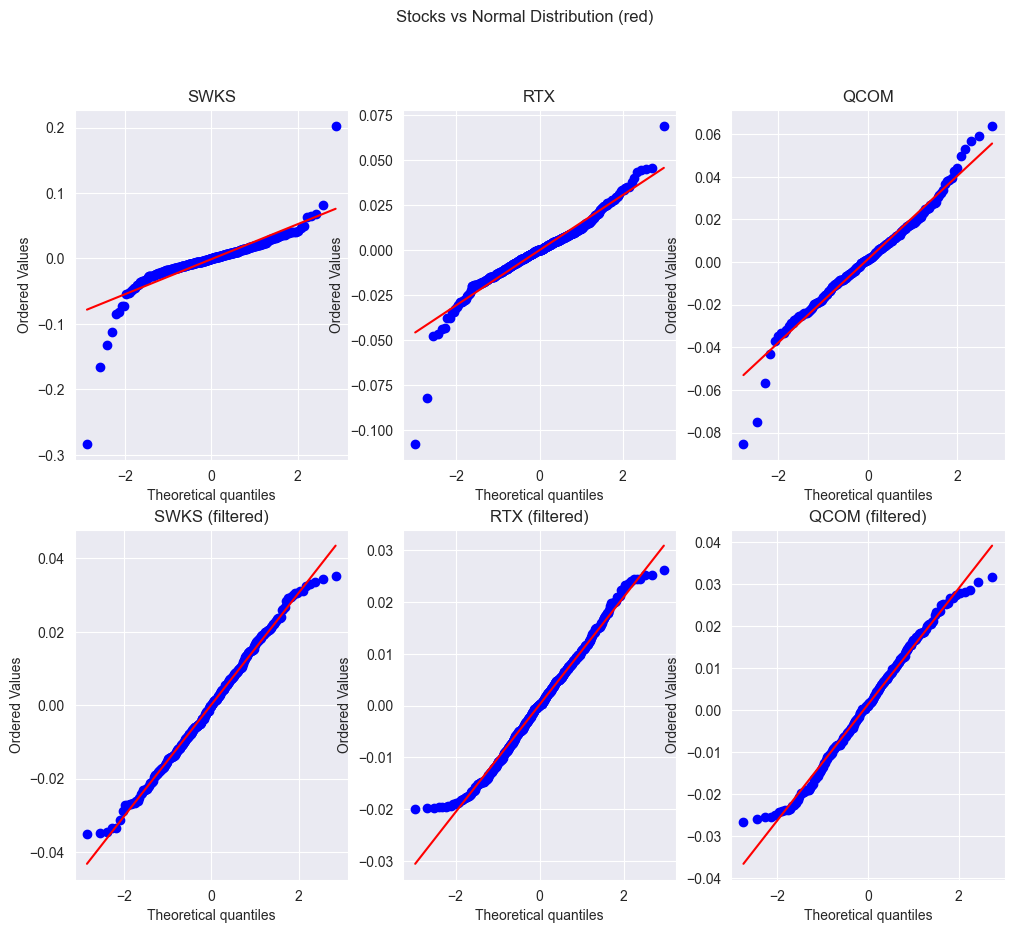

In [9]:
import random
i=11
sample = random.sample(FNormalStocksDP[i], 3)
print("Sample of 3 random tickers from the S&P 500:")
print(sample)   
z = []
g = []


for i in range(len(sample)):
    w = [y for y in stock_logreturns[i][sample[i]] if not np.isnan(y)]
    w = np.array(w)
    g.append(w)


for i in range(len(sample)):
        w= [y for y in stock_logreturns[i][sample[i]] if not np.isnan(y)]
        w= np.array(w)
        upper = np.percentile(w, 95)
        lower = np.percentile(w,5)
        x= [y for y in w if y>= lower and y <= upper]
        x = np.array(x)
        z.append(x)


fig, axes = plt.subplots(2, 3, figsize=(12, 10))
plt.suptitle("Stocks vs Normal Distribution (red)")
datasetExtremeExcl = z
datasetExtremeIncl = g
set1 = [(datasetExtremeIncl[0], sample[0]), (datasetExtremeIncl[1], sample[1]), (datasetExtremeIncl[2], sample[2])]
set2 = [(datasetExtremeExcl[0], sample[0]+ ' (filtered)'), (datasetExtremeExcl[1], sample[1]+ ' (filtered)'), (datasetExtremeExcl[2], sample[2]+ ' (filtered)')]
for ax, (data, title) in zip(axes.flatten(), set1+set2):
    stats.probplot(data, dist="norm", plot=ax)
    ax.set_title(title, fontsize=12)

plt.show()


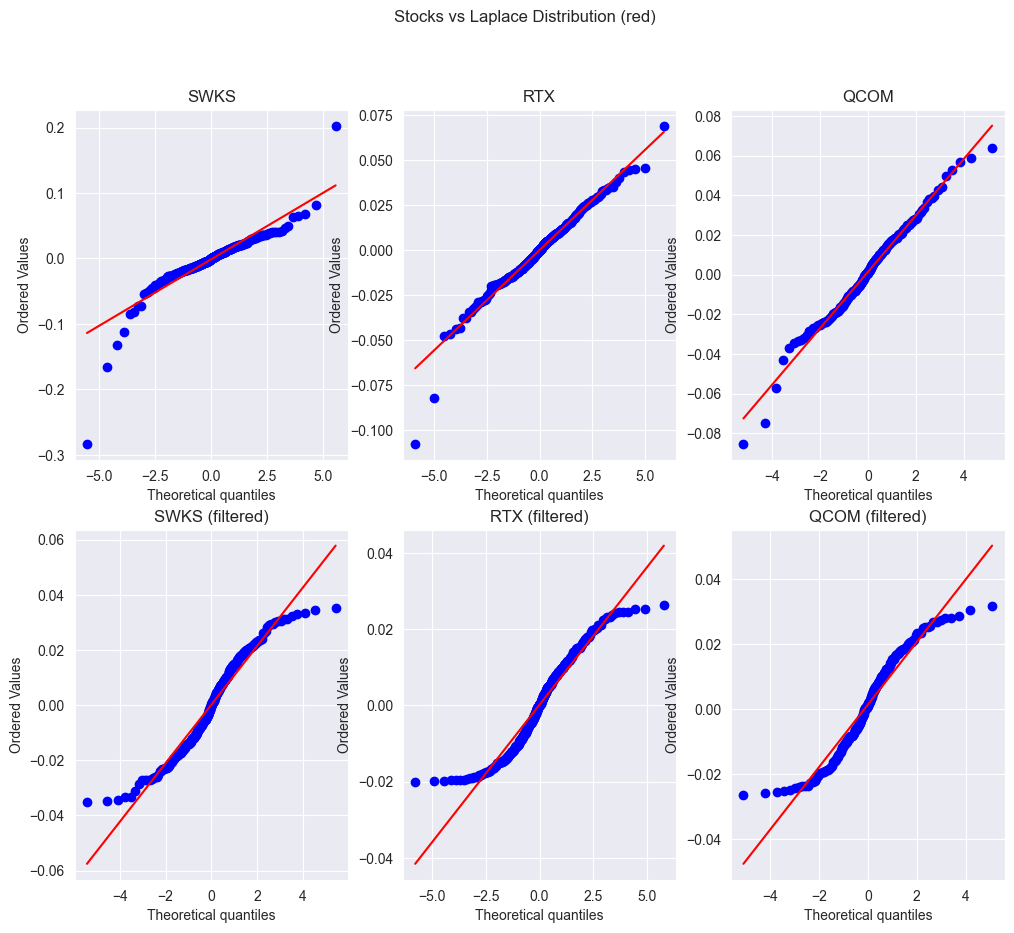

In [10]:
fig2, axes2 = plt.subplots(2, 3, figsize=(12, 10))
plt.suptitle("Stocks vs Laplace Distribution (red)")
datasetExtremeExcl = z
datasetExtremeIncl = g
set1 = [(datasetExtremeIncl[0], sample[0]), (datasetExtremeIncl[1], sample[1]), (datasetExtremeIncl[2], sample[2])]
set2 = [(datasetExtremeExcl[0], sample[0]+ ' (filtered)'), (datasetExtremeExcl[1], sample[1]+ ' (filtered)'), (datasetExtremeExcl[2], sample[2]+ ' (filtered)')]
for ax, (data, title) in zip(axes2.flatten(), set1+set2):
    stats.probplot(data, dist="laplace", plot=ax)
    ax.set_title(title, fontsize=12)

plt.show()

In this time period, the results are similar. Filtered data fits the Laplace distribution worse than the normal distribution. Raw data seems to fit the Laplace distribution in a comparable way to the normal distribution. 

Conclusions: Given the observations at each steps, for long-running company stocks such as the stocks of Fortune 500 companies, it appears to be reasonable to assume that stock paths follow a normal distribution for time periods less than ~12 months. This assumption comes with the caveat that extreme behavior is not accounted for, and the fit is not perfect. 